<a href="https://colab.research.google.com/github/nanmanchu/APTprice/blob/main/7_XGBoost_Price_Pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler # Standardization
from sklearn.preprocessing import Normalizer # Standardization
from keras.callbacks import EarlyStopping # Early Stopping Callback
import warnings
warnings.filterwarnings('ignore') # To ignore warnings.

import xgboost as xgb
from sklearn.metrics import mean_squared_error

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

from sklearn.metrics import classification_report, accuracy_score

from sklearn.metrics import confusion_matrix

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import time

In [ ]:
import IPython

In [ ]:
from sklearn.model_selection import train_test_split
#from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix



In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/apt/isol3.csv')

In [ ]:
data

,BEECgroup,Gseed,area,floor,ConstructionYear,OfficialValue,parking,ParkingSpace,pricePerM2,Households,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
0,0.0,0.0,97.86,6,2005.0,2.820000e+08,2431.0,1.428,5.109340e+04,1702.0,2008,3.0,0,1,0,0,0
1,0.0,0.0,84.78,3,2004.0,1.880000e+08,2431.0,1.428,5.897617e+04,1702.0,2007,3.0,0,1,0,0,0
2,0.0,0.0,56.97,7,1999.0,9.900000e+07,2431.0,1.428,6.143584e+04,1702.0,2010,11.0,0,0,0,0,1
3,0.0,0.0,100.53,2,2008.0,9.900000e+07,2431.0,1.428,7.858351e+04,1702.0,2008,0.0,0,0,0,1,0
4,0.0,0.0,83.70,2,2008.0,9.900000e+07,2431.0,1.428,7.885305e+04,1702.0,2008,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090436,0.0,0.0,59.52,3,1999.0,5.922941e+08,2280.0,1.324,1.444892e+07,1722.0,2018,19.0,0,1,0,0,0
1090437,0.0,0.0,105.89,3,1979.0,9.753663e+08,0.0,0.000,1.444896e+07,1212.0,2017,38.0,0,1,0,0,0
1090438,0.0,0.0,84.78,2,1994.0,5.937931e+08,0.0,0.000,1.444916e+07,638.0,2018,24.0,0,0,1,0,0
1090439,0.0,0.0,55.02,10,1987.0,7.107222e+08,1879.0,0.606,1.444929e+07,3100.0,2019,32.0,0,0,0,0,1


# XGBoost

In [ ]:
df=data.copy()

In [ ]:

#정규화
scaler = StandardScaler()  #StandardScaler

# StandardScaler 로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
scaler.fit(df)
ssss2 = scaler.transform(df)

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
df = pd.DataFrame(data=ssss2, columns=df.columns)

In [ ]:
df

,BEECgroup,Gseed,area,floor,ConstructionYear,OfficialValue,parking,ParkingSpace,pricePerM2,Households,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
0,-0.093403,-0.087304,0.934585,-0.470140,0.818426,-0.227000,1.266841,0.979869,-2.258468,0.530569,-1.192590,-1.370967,-0.766039,2.036111,-0.187296,-0.332591,-0.658346
1,-0.093403,-0.087304,0.372809,-0.995557,0.700708,-0.759698,1.266841,0.979869,-2.255539,0.530569,-1.414994,-1.370967,-0.766039,2.036111,-0.187296,-0.332591,-0.658346
2,-0.093403,-0.087304,-0.821608,-0.295001,0.112117,-1.264061,1.266841,0.979869,-2.254625,0.530569,-0.747780,-0.480344,-0.766039,-0.491132,-0.187296,-0.332591,1.518958
3,-0.093403,-0.087304,1.049259,-1.170695,1.171580,-1.264061,1.266841,0.979869,-2.248253,0.530569,-1.192590,-1.704951,-0.766039,-0.491132,-0.187296,3.006700,-0.658346
4,-0.093403,-0.087304,0.326424,-1.170695,1.171580,-1.264061,1.266841,0.979869,-2.248153,0.530569,-1.192590,-1.704951,-0.766039,-0.491132,-0.187296,3.006700,-0.658346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090436,-0.093403,-0.087304,-0.712087,-0.995557,0.112117,1.531436,1.147186,0.821112,3.091399,0.548784,1.031457,0.410280,-0.766039,2.036111,-0.187296,-0.332591,-0.658346
1090437,-0.093403,-0.087304,1.279467,-0.995557,-2.242244,3.702306,-0.659531,-1.199987,3.091411,0.084295,0.809052,2.525511,-0.766039,2.036111,-0.187296,-0.332591,-0.658346
1090438,-0.093403,-0.087304,0.372809,-1.170695,-0.476473,1.539931,-0.659531,-1.199987,3.091488,-0.438482,1.031457,0.966920,-0.766039,-0.491132,5.339145,-0.332591,-0.658346
1090439,-0.093403,-0.087304,-0.905359,0.230416,-1.300499,2.202568,0.829426,-0.274922,3.091535,1.803815,1.253861,1.857543,-0.766039,-0.491132,-0.187296,-0.332591,1.518958


In [ ]:
#DMatrix형태로 변환

y = df['pricePerM2']
X = df.drop(['pricePerM2'], axis=1)

data_dmatrix = xgb.DMatrix(data=X,label=y)

#train, test 셋 분리

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=df['BEECgroup'])

In [ ]:
%%time

#파이프라인없이
model =  xgb.XGBRegressor(objective ='reg:squarederror', 
                        eta=0.1,
                        n_estimators=500,
                        max_depth=10,
                        min_child_weight=0,
                        gamma=0.3,
                        subsample=0.5,
                        nthread=-1,
                        booster='gbtree')


# train set에 학습
model.fit(X_train, y_train)



CPU times: user 1h 40min 53s, sys: 2.82 s, total: 1h 40min 55s
Wall time: 2min 39s


In [ ]:
y_pred = model.predict(X_test)
print('R-Squared: {}'.format(r2(y_test, y_pred)))

preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

R-Squared: 0.9473861117058402
RMSE: 0.229363


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.504084 to fit


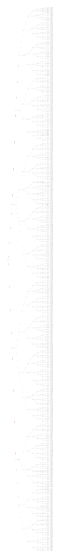

In [ ]:
# #모델 pdf 저장
# import matplotlib.pyplot as plt
# import graphviz
# from matplotlib.backends.backend_pdf import PdfPages

# xgb.plot_tree(model)
# #plt.rcParams['figure.figsize'] = [3000, 1200]

# plt.savefig('xgb.pdf') # dpi=12000, quality=80, optimize=True, progressive=True

from xgboost import plot_tree

# plot_tree(model)
# plt.show()

# plot_tree(model, num_trees=2)


plot_tree(model, num_trees=2, rankdir='LR')

In [ ]:
format = 'svg' #You should try the 'svg'

image = xgb.to_graphviz(model)

#Set a different dpi (work only if format == 'png')
#image.graph_attr = {'dpi':'5500'}

image.render('filename', format = format)

'filename.svg'

#Decision Tree 

In [ ]:
df=data.copy()

In [ ]:

#정규화
scaler = StandardScaler()  #StandardScaler

# StandardScaler 로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
scaler.fit(df)
ssss2 = scaler.transform(df)

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
df = pd.DataFrame(data=ssss2, columns=df.columns)

In [ ]:
df

,BEECgroup,Gseed,area,floor,ConstructionYear,OfficialValue,parking,ParkingSpace,pricePerM2,Households,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
0,-0.093403,-0.087304,0.934585,-0.470140,0.818426,-0.227000,1.266841,0.979869,-2.258468,0.530569,-1.192590,-1.370967,-0.766039,2.036111,-0.187296,-0.332591,-0.658346
1,-0.093403,-0.087304,0.372809,-0.995557,0.700708,-0.759698,1.266841,0.979869,-2.255539,0.530569,-1.414994,-1.370967,-0.766039,2.036111,-0.187296,-0.332591,-0.658346
2,-0.093403,-0.087304,-0.821608,-0.295001,0.112117,-1.264061,1.266841,0.979869,-2.254625,0.530569,-0.747780,-0.480344,-0.766039,-0.491132,-0.187296,-0.332591,1.518958
3,-0.093403,-0.087304,1.049259,-1.170695,1.171580,-1.264061,1.266841,0.979869,-2.248253,0.530569,-1.192590,-1.704951,-0.766039,-0.491132,-0.187296,3.006700,-0.658346
4,-0.093403,-0.087304,0.326424,-1.170695,1.171580,-1.264061,1.266841,0.979869,-2.248153,0.530569,-1.192590,-1.704951,-0.766039,-0.491132,-0.187296,3.006700,-0.658346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090436,-0.093403,-0.087304,-0.712087,-0.995557,0.112117,1.531436,1.147186,0.821112,3.091399,0.548784,1.031457,0.410280,-0.766039,2.036111,-0.187296,-0.332591,-0.658346
1090437,-0.093403,-0.087304,1.279467,-0.995557,-2.242244,3.702306,-0.659531,-1.199987,3.091411,0.084295,0.809052,2.525511,-0.766039,2.036111,-0.187296,-0.332591,-0.658346
1090438,-0.093403,-0.087304,0.372809,-1.170695,-0.476473,1.539931,-0.659531,-1.199987,3.091488,-0.438482,1.031457,0.966920,-0.766039,-0.491132,5.339145,-0.332591,-0.658346
1090439,-0.093403,-0.087304,-0.905359,0.230416,-1.300499,2.202568,0.829426,-0.274922,3.091535,1.803815,1.253861,1.857543,-0.766039,-0.491132,-0.187296,-0.332591,1.518958


In [ ]:
#train, test 셋 분리

from sklearn.model_selection import train_test_split

y = df['pricePerM2']
X = df.drop(['pricePerM2'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=df['BEECgroup'])

In [ ]:
%%time

from sklearn.tree import DecisionTreeRegressor

# model =  xgb.XGBRegressor(objective ='reg:squarederror', 
#                         eta=0.1,
#                         n_estimators=500,
#                         max_depth=10,
#                         min_child_weight=0,
#                         gamma=0.3,
#                         subsample=0.5,
#                         nthread=-1,
#                         booster='gbtree',
#                         seed=2019)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

CPU times: user 8.58 s, sys: 5.97 ms, total: 8.59 s
Wall time: 8.54 s


In [ ]:
y_pred = model.predict(X_test)
print('R-Squared: {}'.format(r2(y_test, y_pred)))

preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

R-Squared: 0.9012324152072507
RMSE: 0.314052


#Gradient Boosting

In [ ]:
df=data.copy()

In [ ]:

#정규화
scaler = StandardScaler()  #StandardScaler

# StandardScaler 로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
scaler.fit(df)
ssss2 = scaler.transform(df)

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
df = pd.DataFrame(data=ssss2, columns=df.columns)

In [ ]:
df

,BEECgroup,Gseed,area,floor,ConstructionYear,OfficialValue,parking,ParkingSpace,pricePerM2,Households,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
0,-0.093403,-0.087304,0.934585,-0.470140,0.818426,-0.227000,1.266841,0.979869,-2.258468,0.530569,-1.192590,-1.370967,-0.766039,2.036111,-0.187296,-0.332591,-0.658346
1,-0.093403,-0.087304,0.372809,-0.995557,0.700708,-0.759698,1.266841,0.979869,-2.255539,0.530569,-1.414994,-1.370967,-0.766039,2.036111,-0.187296,-0.332591,-0.658346
2,-0.093403,-0.087304,-0.821608,-0.295001,0.112117,-1.264061,1.266841,0.979869,-2.254625,0.530569,-0.747780,-0.480344,-0.766039,-0.491132,-0.187296,-0.332591,1.518958
3,-0.093403,-0.087304,1.049259,-1.170695,1.171580,-1.264061,1.266841,0.979869,-2.248253,0.530569,-1.192590,-1.704951,-0.766039,-0.491132,-0.187296,3.006700,-0.658346
4,-0.093403,-0.087304,0.326424,-1.170695,1.171580,-1.264061,1.266841,0.979869,-2.248153,0.530569,-1.192590,-1.704951,-0.766039,-0.491132,-0.187296,3.006700,-0.658346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090436,-0.093403,-0.087304,-0.712087,-0.995557,0.112117,1.531436,1.147186,0.821112,3.091399,0.548784,1.031457,0.410280,-0.766039,2.036111,-0.187296,-0.332591,-0.658346
1090437,-0.093403,-0.087304,1.279467,-0.995557,-2.242244,3.702306,-0.659531,-1.199987,3.091411,0.084295,0.809052,2.525511,-0.766039,2.036111,-0.187296,-0.332591,-0.658346
1090438,-0.093403,-0.087304,0.372809,-1.170695,-0.476473,1.539931,-0.659531,-1.199987,3.091488,-0.438482,1.031457,0.966920,-0.766039,-0.491132,5.339145,-0.332591,-0.658346
1090439,-0.093403,-0.087304,-0.905359,0.230416,-1.300499,2.202568,0.829426,-0.274922,3.091535,1.803815,1.253861,1.857543,-0.766039,-0.491132,-0.187296,-0.332591,1.518958


In [ ]:
#train, test 셋 분리

from sklearn.model_selection import train_test_split

y = df['pricePerM2']
X = df.drop(['pricePerM2'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=df['BEECgroup'])

In [ ]:
%%time

from sklearn.ensemble import GradientBoostingRegressor

# model =  xgb.XGBRegressor(objective ='reg:squarederror', 
#                         eta=0.1,
#                         n_estimators=500,
#                         max_depth=10,
#                         min_child_weight=0,
#                         gamma=0.3,
#                         subsample=0.5,
#                         nthread=-1,
#                         booster='gbtree',
#                         seed=2019)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

CPU times: user 2min 33s, sys: 150 ms, total: 2min 34s
Wall time: 2min 33s


In [ ]:
y_pred = model.predict(X_test)
print('R-Squared: {}'.format(r2(y_test, y_pred)))

preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

R-Squared: 0.8740278985285039
RMSE: 0.354882


#Adaboost

In [ ]:
df=data.copy()

In [ ]:

#정규화
scaler = StandardScaler()  #StandardScaler

# StandardScaler 로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
scaler.fit(df)
ssss2 = scaler.transform(df)

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
df = pd.DataFrame(data=ssss2, columns=df.columns)

In [ ]:
df

,BEECgroup,Gseed,area,floor,ConstructionYear,OfficialValue,parking,ParkingSpace,pricePerM2,Households,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
0,-0.093403,-0.087304,0.934585,-0.470140,0.818426,-0.227000,1.266841,0.979869,-2.258468,0.530569,-1.192590,-1.370967,-0.766039,2.036111,-0.187296,-0.332591,-0.658346
1,-0.093403,-0.087304,0.372809,-0.995557,0.700708,-0.759698,1.266841,0.979869,-2.255539,0.530569,-1.414994,-1.370967,-0.766039,2.036111,-0.187296,-0.332591,-0.658346
2,-0.093403,-0.087304,-0.821608,-0.295001,0.112117,-1.264061,1.266841,0.979869,-2.254625,0.530569,-0.747780,-0.480344,-0.766039,-0.491132,-0.187296,-0.332591,1.518958
3,-0.093403,-0.087304,1.049259,-1.170695,1.171580,-1.264061,1.266841,0.979869,-2.248253,0.530569,-1.192590,-1.704951,-0.766039,-0.491132,-0.187296,3.006700,-0.658346
4,-0.093403,-0.087304,0.326424,-1.170695,1.171580,-1.264061,1.266841,0.979869,-2.248153,0.530569,-1.192590,-1.704951,-0.766039,-0.491132,-0.187296,3.006700,-0.658346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090436,-0.093403,-0.087304,-0.712087,-0.995557,0.112117,1.531436,1.147186,0.821112,3.091399,0.548784,1.031457,0.410280,-0.766039,2.036111,-0.187296,-0.332591,-0.658346
1090437,-0.093403,-0.087304,1.279467,-0.995557,-2.242244,3.702306,-0.659531,-1.199987,3.091411,0.084295,0.809052,2.525511,-0.766039,2.036111,-0.187296,-0.332591,-0.658346
1090438,-0.093403,-0.087304,0.372809,-1.170695,-0.476473,1.539931,-0.659531,-1.199987,3.091488,-0.438482,1.031457,0.966920,-0.766039,-0.491132,5.339145,-0.332591,-0.658346
1090439,-0.093403,-0.087304,-0.905359,0.230416,-1.300499,2.202568,0.829426,-0.274922,3.091535,1.803815,1.253861,1.857543,-0.766039,-0.491132,-0.187296,-0.332591,1.518958


In [ ]:
#train, test 셋 분리

from sklearn.model_selection import train_test_split

y = df['pricePerM2']
X = df.drop(['pricePerM2'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=df['BEECgroup'])

In [ ]:
%%time

from sklearn.ensemble import AdaBoostRegressor

# model =  xgb.XGBRegressor(objective ='reg:squarederror', 
#                         eta=0.1,
#                         n_estimators=500,
#                         max_depth=10,
#                         min_child_weight=0,
#                         gamma=0.3,
#                         subsample=0.5,
#                         nthread=-1,
#                         booster='gbtree',
#                         seed=2019)

model = AdaBoostRegressor()

model.fit(X_train, y_train)

CPU times: user 1min 3s, sys: 78.8 ms, total: 1min 3s
Wall time: 1min 3s


In [ ]:
y_pred = model.predict(X_test)
print('R-Squared: {}'.format(r2(y_test, y_pred)))

preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

R-Squared: 0.6855494495839713
RMSE: 0.560944
